<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/California_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House price prediction using simple linear regression

Using supervised linear regression technique, this project will predict values of unknown houses based on certain input parameters. This project tries to find the best fit line for a set of data that consists of a single parameter. The dependent variable(Y) is shown how it changes for a new input(X). This project uses the dataset from scikit's california housing prices.

In [ ]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
california_data = fetch_california_housing()

In [ ]:
print(california_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
#creating a dataframe for more readability
california_df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

In [ ]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_df["prices"] = california_data.target

In [ ]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


From the above dataframe it can be noticed that we are interested to plot a graph between the number of rooms and the coresponding prices.

In [ ]:
#checking if there are any null values in the dataset
california_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
prices,0


Here the number of rooms is independent variable(x) and the coresponding prices is the dependent variable(y). we will now split the data into training data and testing data.

That is,

Y = mX + C
where m is the slope,
  x = independent variable
  Y = predictions or target
  C is intercept that is the coefficient

In [ ]:
#spliting the data into training data and testing data
X = pd.DataFrame(np.c_[california_df["AveRooms"]], columns=["AveRooms"])
Y = california_df["prices"]

In [ ]:
print(X)

       AveRooms
0      6.984127
1      6.238137
2      8.288136
3      5.817352
4      6.281853
...         ...
20635  5.045455
20636  6.114035
20637  5.205543
20638  5.329513
20639  5.254717

[20640 rows x 1 columns]


In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: prices, Length: 20640, dtype: float64


In [ ]:
#spliting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20640,) (16512,) (4128,)


Training the simple regression model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(f"The Intercept of the equation is {model.intercept_}")
print(f'The coeffcient of the model is {model.coef_[0]}')

The Intercept of the equation is 1.6327651949593742
The coeffcient of the model is 0.0798724062572278


Since the model is trained now we try to predict some house prices

In [ ]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame({"Actual": Y_test, "Predicted": y_pred})
print(predictions)

       Actual  Predicted
10385   2.787   2.234009
1943    2.076   2.138364
7490    0.967   2.061613
16889   3.538   1.966105
11416   3.905   2.319856
...       ...        ...
13767   1.466   2.124819
20606   0.566   2.043335
7340    1.760   1.901488
14312   0.773   1.942573
20262   2.354   2.024103

[4128 rows x 2 columns]


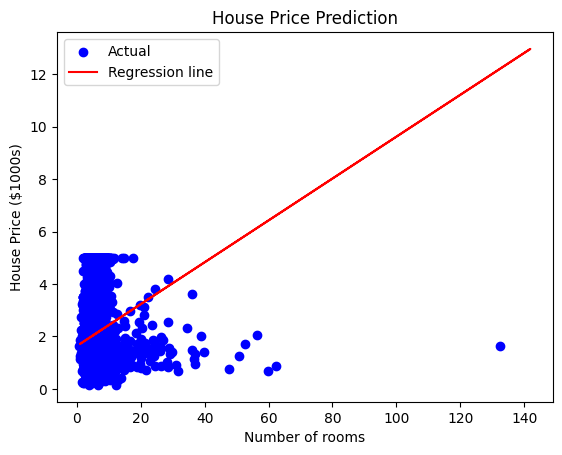

In [ ]:
#ploting a graph between the rooms and the prices to get a better understanding of the data we have analysed
plt.scatter(X_train,Y_train,color="blue",label="Actual")
plt.plot(X_test,y_pred,color="red",label="Regression line")

plt.xlabel("Number of rooms")
plt.ylabel('House Price ($1000s)')
plt.title('House Price Prediction')

plt.legend()